# Исследование объявлений о продаже квартир

Есть данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Основная задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Общая информация

In [28]:
#импортируем все необходимые библиотеки 
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.simplefilter('ignore')

In [29]:
#чтобы данные не склеились в одну строку, используем параметр sep
data = pd.read_csv("C:/Users/alfro/Documents/Daria_Jupyter/Datasets/real_estate_data.csv", sep = "\t") 

display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Дан двумерный массив из данных о 23699 объявлениях о продаже квартир: каждое объявление сообщает 22 признака. 17 из них относятся к колличесвенным признакам (например, стоимость на момент снятия публикации или площадь), 3 к качественным (например, название населенного пункта) и 2 к логическим (например, является ли квартира студией). Столбцы названы корректно, за исключением cityCenters_nearest - тут присутсвует заглавная буква.
Также указано, что часть столбцов была заполнена автоматически по картографическим данным.  

Количество значений в столбцах различается. Это говорит о том, что в данных есть пропущенные значения:
1. Больше всего пропусков в столбце is_apartment (который говорит о том, является ли квартира апартаментами). К тому же, тип этих данных - object, что нелогично. 
2. В данных, полученных автоматически также большое колличетво пропусков: в столбцах ponds_nearest (расстояние до ближайшего водоема) и parks_nearest (расстояние до ближайшего парка) более 60% пропусков. В других столбцах о расстояниях (до центра, до аэропорта) и о количестве водоемов и парков в радиусе 3км более 20% пропусков. 
3. В столбцах о количесве балконов и о высоте потолков в райне 40-50% пропусков.
4. В столбцах о площадях в квартире и колличестве дней, когда объявление висело - в районе 10% пропусков. 

### Вывод

Каждая строка таблицы содержит информацию о квартире, высталенной на продажу. Две проблемы, которые нужно решить: пропуски и неверный тип данных. Также стоит переименовать один столбец и проверить наличие дубликатов. 

### Шаг 2. Предобработка данных

#### Пропуски 


In [30]:
data.isnull().sum() # посмотрим общее кол-во пропусков 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

1. Рекордсмен по колличесву пропусков столбец is_apartment 88%. Посмотрим, какие значения все-таки есть.

In [31]:
data["is_apartment"].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Во всей таблице лишь 50 квартир, которые указаны как апартаменты. Рассмотрим их подробне. 

In [32]:
data.query('is_apartment == True')["locality_name"].value_counts()

Санкт-Петербург    39
Выборг              3
Красное Село        1
Никольское          1
Зеленогорск         1
Колпино             1
деревня Нижняя      1
посёлок Щеглово     1
Петергоф            1
Всеволожск          1
Name: locality_name, dtype: int64

Все квартиры, которые сообщают о себе, что они апартаменты, находятся в основном в Петербурге. Доля таких квартир очень мала - 2% от тех, кто что-то указывал в этой графе (соответсвенно для всей таблицы это будет 0,2%). Похоже, что лишь небольое колличесвто жителей Петербурга  брали во внимание определение апартаментов. Для целей исследования этот параметр не является ключевым, поэтому пока оставим его в таком виде и возможно в будущем обратим внимание на то, как люди дают ответ на этот вопрос. 

2. Водоемы и парки. Эти данные заполнялись автоматически и видимо был задан некий радиус в пределах которого совершался поиск (он явно больше 3км, так как у нас есть значения 0). Можно предположить, что если не было найдено водоемов и парков, то в таблице появлялся пропуск. Однако, для нашего анализа эти данные не важны, так что оставим их без изменений

3. Балконы. Логично предположить, что есть колличество балконов не указано, их нет, поэтому заполним пропуски 0 

In [33]:
print("Пропусков в столбце о колличестве балконов:", data["balcony"].isna().sum())

Пропусков в столбце о колличестве балконов: 11519


In [34]:
data['balcony'] = data['balcony'].fillna(0)
print("Пропусков в столбце о колличестве балконов:", data["balcony"].isna().sum())

Пропусков в столбце о колличестве балконов: 0


4. Пропуски в этажности дома. В этом столбце больше всего пропусков в Санк-Петербурге

In [35]:
data.query("floors_total.isna()")["locality_name"].value_counts()

Санкт-Петербург                    70
Кудрово                             2
Красное Село                        2
поселок Мурино                      2
посёлок Мурино                      2
деревня Новое Девяткино             1
поселок городского типа Токсово     1
посёлок Шушары                      1
городской посёлок Новоселье         1
посёлок Стрельна                    1
посёлок Щеглово                     1
посёлок Бугры                       1
Name: locality_name, dtype: int64

Можно было бы взять медианное или среднее значение по населенному пункту, но тогда может получится, что квартира находится на этаже, который выше, чем сам дом (так как в столбце про этаж нет пропусков). Также можно допустить, что эти квартиры расположены на последних этажах своих домов, однако общая доля пропусков мала (меннее 0.5%) и этот параметр нам нужен для дальнейшей работы, поэтому для точности результатов, лучше исключить эти данные из анализа 

In [36]:
data.dropna(subset = ["floors_total"], inplace=True)


5. Пропуски площадей - жилой и кухонной. Пропуски о площадям соствляют порядка 10% от всех данных, это довольно много, однако у нас нет пропусков в данных об общей плошади. Будем исходить из того, что жидая площадь и площадь кухни зависят друг от друга и найдем некий коэффициент, который показывает это соотношение. Возмьмем его медианное значение (на тот случай, если в таблице есть аномально большие кухни или жилые площади) и умножим на площадь квартиры, заполнив пропуски по жилой площади и площади кухни. 

In [37]:
k = data.query('living_area >= 0')["living_area"]/data.query('living_area >= 0')["total_area"] 
l = data.query('kitchen_area >= 0')["kitchen_area"]/data.query('kitchen_area >= 0')["total_area"] 

data['living_area'] = data['living_area'].fillna(data['total_area'] * k.median())
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * l.median())


6. Расстояния до аэропорта и центра. Попробуем заменить пропуски в графах расстояние до аэропорта и до центра на медианные расстояния, соответсвующие населенному пункту.


In [38]:
data['airports_nearest'] = data['airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform('mean'))
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('median'))
#проверим колличество пропусков теперь 
print('Количество пропусков в столбце расстояние до аэропорта:', data['airports_nearest'].isna().sum())
print('Количество пропусков в столбце расстояние до центра города:', data['cityCenters_nearest'].isna().sum())

Количество пропусков в столбце расстояние до аэропорта: 5440
Количество пропусков в столбце расстояние до центра города: 5440


Оказалось, что мы смогли убрать лишь малую часть пропусков. Это может быть связано с двумя причинами: в данных могут быть неявные дубликаты (например, один и тот же населенный пункт назван по-разному: поселок, посёлок, пгт и др.) и медианное расстояние можно посчитать только для одного из них. Также в данных могут встречаться в большом колличесве населенные пункты о которых вообще нет никаких данных по расположению (например, какой-нибудь поселок, название которого не нанесено на карты по которым заполнялись столбцы с расстоянием). 
Для целей нашего исследования столбец с расстоянием до центра нужен будет в основном для объявлений в Санк-Петербурге. Посмотрим сколько пропущенных значений осталось именно там.

In [39]:
print('Количесвто пропуско по расстоянию до центра в Санкт-Петербурге:', 
data.query('locality_name == "Санкт-Петербург"')["cityCenters_nearest"].isna().sum())

Количесвто пропуско по расстоянию до центра в Санкт-Петербурге: 0


In [40]:
#Так же посмотрим минимальные и максимальные расстояния до центра:
data["cityCenters_nearest"].describe()

count    18173.000000
mean     14187.718841
std       8611.004157
min        181.000000
25%       9241.000000
50%      13072.000000
75%      16280.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Максимальное расстояние до центра 66км, притом, что 75% известных значений кладывается в 17 км. Для всей ленинградской области это очень маленькие цифры, так как её протяжонность более 300 км. Выдвинем гипотезу о том, что этот параметр указан только у тех населенных пунктов, кототрые входят в состав районов Санкт-Петербурга. Например, поселок Молодежное - самая дальняя точка по расстоянию от центра входит в состав курортного района, а вот Гатчина, которая расположена в 42 км от Санкт-Петербурга принадлежит Ленобласти и по ней нет никаких данных о расположении. Похоже, эти данные заполнялись следующим образом: считывалось название населенного пункта, если он принадлежит к административной единице Санкт-Петербург, то считалось расстояние до центра и аэропорта, а если нет, то в этих графах шел пропуск.

In [41]:
display(data.query('cityCenters_nearest == 65968'))
display(data.query('locality_name == "Гатчина"').sample(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9640,8,4200000.0,51.4,2014-12-10T00:00:00,2,2.55,5.0,31.0,2,NaN,...,6.0,1.0,посёлок Молодёжное,84869.0,65968.0,0.0,NaN,0.0,NaN,1194.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
13252,10,3000060.0,55.0,2017-10-29T00:00:00,3,2.60,5.0,42.500000,3,NaN,...,5.5,0.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,30.0
17239,6,3050000.0,41.0,2018-11-16T00:00:00,2,NaN,5.0,27.200000,4,NaN,...,5.8,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,32.0
14962,2,3550000.0,58.0,2015-05-27T00:00:00,2,NaN,5.0,32.000000,1,False,...,9.0,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,488.0
10366,8,1800000.0,32.0,2017-10-30T00:00:00,1,2.50,5.0,18.000000,4,NaN,...,6.0,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,143.0
9996,12,4100000.0,50.0,2018-03-15T00:00:00,2,2.55,5.0,28.409091,1,NaN,...,12.0,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,7.0


In [42]:
data.isna().sum() #посмотрим колличесвто пропусков теперь 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9118
floors_total                0
living_area                 0
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              48
airports_nearest         5440
cityCenters_nearest      5440
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

#### Вывод

Часть пропусков удалось логически заполнить (столбы с площадью кухни, жилой площадью, наличием балкона). Еще часть пропусков решено оставить, так как либо они не нужны нам для дальнейшей работы (например, наличие водоемов в округе или столбец про апартаменты), либо пока неочевидно чем их можно заполнить (столбец с высотой потлка).

#### Дубликаты и переименование столбца

Проверяем наличие дубликатов 

In [43]:
print("Колличество полных дубликатов", data.duplicated().sum() )


Колличество полных дубликатов 0


Посмотрим какие значения есть в столбце с названиями населенных пунктов

In [44]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Переименуем столбец с расстоянием до центра, убрав заглавную букву 

In [45]:
data.rename(columns={ data.columns[16]: "city_centers_nearest" }, inplace=True)
data.sample()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
13552,9,1200000.0,47.2,2018-10-01T00:00:00,2,2.5,5.0,32.8,3,NaN,...,5.3,0.0,деревня Лампово,NaN,NaN,NaN,NaN,NaN,NaN,88.0


#### Вывод 

В данных необнаружено полных дубликатов, однако могут встречатся неявные дубликаты в названиях населенных пунктов (например, поселок и посёлок. В рамках данного исследования возможное наличие таких дуликатов не сильно скажется на результате, так как мы исследуем либо все объеяления в целом, либо центральный сегмент. Однако, если будет прводится более подробная работа по ленинградской области, будет нелишним проверить это. 
Названия всех столбцов преведены к одному виду

#### Типы данных 

Ещё раз вызовем метод info() для того, чтобы увидеть, какие типы данных представлены

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        14495 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23613 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Столбец first_day_exposition представлен в типе object, но это должна быть дата. Изменим формат

In [47]:
data["first_day_exposition"] = pd.to_datetime(data["first_day_exposition"], format= "%Y-%m-%dT%H:%M:%S")


Столбцы про колличесво этажей в доме и колличество балконов следует сделать целыми числами

In [48]:
data["floors_total"] = data["floors_total"].astype('int')
data["balcony"] = data["balcony"].astype('int')


#### Вывод 

Были изменены типы данных, обозначающих дату и колличесва этажей и балконов на более подходящие 

### Шаг 3. Расчет дополнительных параметров

1. Добавим столбец, который считает цену квадратного метра, разделив цену на общую площадь

In [49]:
data["square_m_price"] = data["last_price"] / data["total_area"]
#data.sample(5)

2. Добавим столбцы с днем недели (от 0 до 6), месяцем и годом публикации объявления 

In [50]:
data['weekday_exp'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month_exp'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_exp'] = pd.DatetimeIndex(data['first_day_exposition']).year
#data.sample(5)

3. Добавим столбец, который указывает этаж. Для этого напишем функцию, которая распределяет данные об этажах в категории первый, последний, другой

In [51]:
def to_floors(row):
    floors = row["floor"]
    total = row["floors_total"]
    if floors == 1:
        return "первый"
    elif floors == total:
        return "последний"
    else:
        return "другой"

data["floor_first_last"] = data.apply(to_floors, axis=1)
#data.sample(5)

4. Добавим 2 солбца, которые показывают соотношения плошадей: жилой к общей и площади кухни к общей

In [52]:
data['living_total_ratio'] = data['living_area'] / data['total_area']
data['kitchen_total_ratio'] = data['kitchen_area'] / data['total_area']
#data.sample(5)

In [53]:
data.head() # проверим, колличество и названия столбцов

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_m_price,weekday_exp,month_exp,year_exp,floor_first_last,living_total_ratio,kitchen_total_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,NaN,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.600000,1,NaN,...,0.0,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.300000,4,NaN,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,90.340909,9,NaN,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,0.568182,0.172348
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,NaN,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000


#### Вывод 

В таблицу были добавлены столбцы с различными календарными указаниями даты продажи, с ценой квадратного метра, с отношениями разных видов площадей. Также данные были категорезированы по указания этажа. 

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Изучение параметров

##### Площадь

In [54]:
display(data['total_area'].describe())

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

Максимальная площадь очень огромная, явно это некий выброс. Построим диграмму ящика с усами.

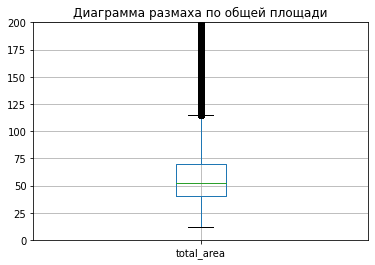

In [55]:
data.boxplot(column='total_area')
plt.ylim(0,200)
plt.title('Диаграмма размаха по общей площади')
plt.show()

Верхний ус заканчивается где-то у 115 метров, то есть нормальные значения для наших данных ограничиваются 115 м. Посмотрим, сколько таких выбросов

In [56]:
print("Процент квартир с площадью более 115 кв.м.: {:.1%}".format(
    len(data.query('total_area > 115')) / len(data['total_area'])))

Процент квартир с площадью более 115 кв.м.: 5.1%


Процент таких квартир довольно велик, однако это очень нехарактерные квартиры для наших данных. Построим гистограмму по данным без учета этих квартир 

(0.0, 120.0)

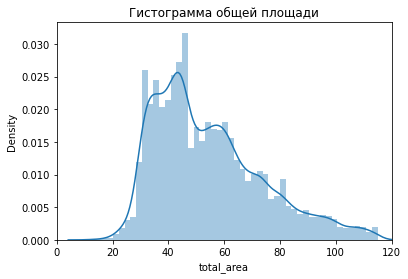

In [57]:
sns.distplot(data.query('total_area <= 115')['total_area'], kde=True, bins=50)
plt.title('Гистограмма общей площади')
plt.xlim(0, 120)

Большая часть квартир из данных имеет площадь около 45 кв.м., так же довольно много квартир с площадью 60 кв.м. Определенную долю составяют маленькие квартиры (менее 40 кв.м.), что вполне может соответсвовать реальности, так как в Санк-Петербурге и окрестностях часто перестраивают коммуналки, отделяя от них маленькие части и делая там, например двухуровневые отдельные квартиры (поэтому даже минимальное значение в 12 кв.м. может быть реальным). Площади более 80 кв.м. тоже встречаются довольно редко 

##### Цены

Цены на квартиры представлены очень большими числами, так что для удобства разделим столбец на 1 000 000 

In [58]:
data['last_price'] = data['last_price'].apply(lambda x: x / 1000000)

In [59]:
display(data['last_price'].describe())

count    23613.000000
mean         6.540555
std         10.901723
min          0.012190
25%          3.400000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price, dtype: float64

Явно есть вбросы со очень высокой стоимостью (просто огромное страндартное отклонение), посморим на диаграмму размаха.

(0.0, 40.0)

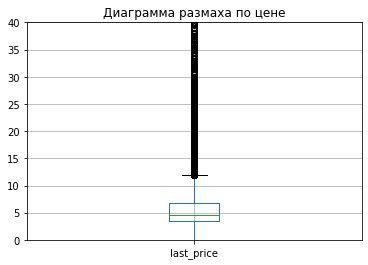

In [60]:
data.boxplot(column="last_price")
plt.title("Диаграмма размаха по цене")
plt.ylim(0, 40)

Выделим аномально дорогие квартиры и постороим диаграмму для остальных значений

In [61]:
print("Процент квартир, стоимостью более 12 млн: {:.1%}".format( 
len(data.query('last_price > 12')) / len(data['last_price'])))

Процент квартир, стоимостью более 12 млн: 8.2%


Text(0.5, 1.0, 'Гистограмма цен на момент снятия публикации')

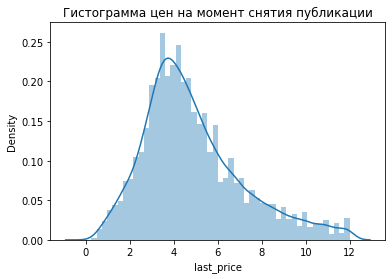

In [62]:
sns.distplot(data.query('last_price <= 12')['last_price'], kde=True, bins=50)
plt.title('Гистограмма цен на момент снятия публикации')

Распределение выглядит близким к нормальному. Больше всего квартир стоят в районе 4 млн. Почти все квартиры стоят до 2 до 8 млн

##### Комнаты 

In [63]:
data['rooms'].value_counts()

1     8015
2     7913
3     5795
4     1177
5      325
0      194
6      104
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

В таблице есть порядка 30 квартир с колличеством колмнат больше 7 и 194 квартиры с колличеством 0 комнат. Владельцы могли указывать 0 комнат, если у них квартира-студия, например или свободная планировка. Исключим квартиры с указанием 0 комнат и ограничимся максимальным колличесвтом в 6 комнат  

Text(0.5, 1.0, 'Гистограмма колличества комнат')

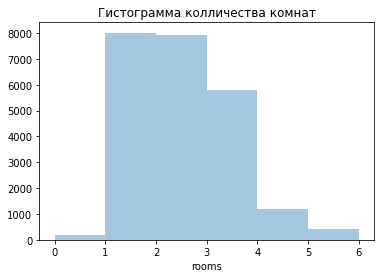

In [64]:
sns.distplot(data.query('rooms <= 6')['rooms'], kde = False, bins = 6)
plt.title('Гистограмма колличества комнат')

Квартиры с более, чем 3ми комнатами встречаются реже, чем однакомнатные или двухкомнатные, их колличесва почти равны. 

##### Высота потолка

Данные о высоте потолков отсутствуют примерно в 40% процетах таблицы и на этом этапе пропуски пока оставлены в таблице. Отбросить такое большое колличесво данных нерезонно, поэтому пока проведем часть аналиа данных, которая связана с высотой потолка на только на 60% от того, что у нас есть

Text(0.5, 1.0, 'Диаграмма размаха по высоте потолка')

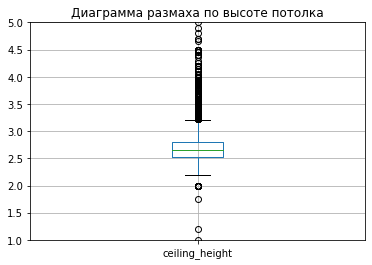

In [65]:
data_temp = data.query('ceiling_height > 0')
data_temp["ceiling_height"].describe()
data.boxplot(column='ceiling_height')
plt.ylim(1, 5)
plt.title('Диаграмма размаха по высоте потолка')


Есть некоторое колличесво квартир с указанными потолками с потолками в 100 или каких-то других огромных чисел. Скорее всего эти данные заполнены некорректно, кто-то забыл запятую или просто перепутал значение. Проверим много ли таких квартир 

In [66]:
print('Процент квартир с высотой потолка более 3,2 м: {:.1%}'. format( 
len(data_temp.query('ceiling_height > 3.2')) / len(data_temp['ceiling_height'])))

Процент квартир с высотой потолка более 3,2 м: 5.6%


Постороим гистограмму для квартир, где потолки ниже 3.2м 

Text(0.5, 1.0, 'Гистограмма высоты потолка')

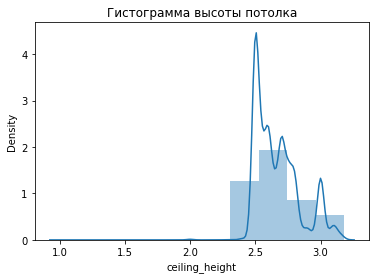

In [67]:
sns.distplot(data.query('ceiling_height < 3.2')['ceiling_height'], kde = True, bins = 10)
plt.title('Гистограмма высоты потолка')

Большинство квартир (из тех, что указали высоту потолка) имеею высоту 2,5 м - типиная высота для хрущевки. Также довольно много квартир с потолком в районе 2,7м - возможно это относительно новые дома с потолками несколько выше. Еще один пик в районе 3м. - это могут быть старые дома с высокими потолками, которые иногда встречаются в Петербурге. 
Дома с разными потолками принадлежат к разным категория домов и разным годам постройки, таким образом можно предположить, что в большинстве пяти-шестиэтажек высота потолка будет типичнаядля такой этажности, так же как и в домах выше 20ти этажей. Основывваясь на это гипотезе заполним пропуски в этом столбце медианой по этажности домов.

In [68]:
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('floors_total')['ceiling_height'].transform('median'))

print('Колличесвто пропусков высоты потока:', data['ceiling_height'].isna().sum())

Колличесвто пропусков высоты потока: 1


В столбце про потолок остался 1 пропуск, видимо дом с таким колличесвом этажей, встречается всего лишь 1 раз в таблице. Пока оставим этот пропуск

##### Время продажи квартиры

In [69]:
print('Пропусков в столбце о времени продажи:', data['days_exposition'].isna().sum())

Пропусков в столбце о времени продажи: 3172


In [70]:
display(data['days_exposition'].describe())
print("Медианное время продажи:", data['days_exposition'].median())
print("Среднее время продажи:", data['days_exposition'].mean())

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медианное время продажи: 95.0
Среднее время продажи: 180.88483929357665


В таблице в столбце по времени продажи остались пропуски (около 13%), будем иметь это в виду. Среденее и медианное значение отличаются во много раз, значит в таблице есть длинный хвост высоких значений (или несколько очень больших значений), которые влияют на среднее, но не на медиану. Также самые максимальные значения тоже довольно редки.Построим гистограмму, без учета самых редких значений 

Text(0.5, 1.0, 'Диаграмма размаха по времени продажи')

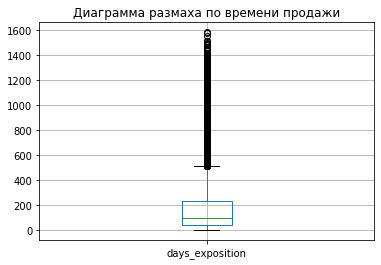

In [71]:
data.boxplot(column='days_exposition')
plt.title('Диаграмма размаха по времени продажи')
#plt.ylim(0,200) - чуть подробнее рассмотрим правый ус 

In [72]:
print('Доля квартир, которые продовались дольше 550 дней: {:.1%}'.format(
    len(data.query('days_exposition > 550')) / len(data['days_exposition'])))

Доля квартир, которые продовались дольше 550 дней: 6.2%


Text(0.5, 1.0, 'Гистограмма по времени продажи')

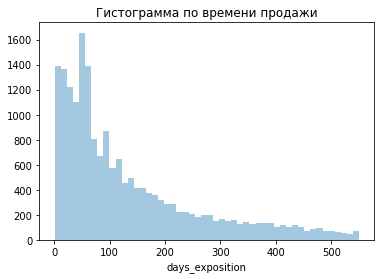

In [73]:
sns.distplot(data.query('days_exposition <= 550')['days_exposition'], kde = False, bins = 50)
plt.title('Гистограмма по времени продажи')


Есть явные пики в значениях до 200, посмотрим эти значения подронеее, построив гистограмму, с максимальным значением 100

Text(0.5, 1.0, 'Гистограмма по времени продажи до 80 дней')

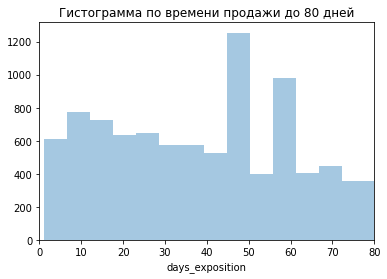

In [74]:
sns.distplot(data.query('days_exposition <= 550')['days_exposition'], kde = False, bins = 100)
plt.xlim(0,80)
plt.title('Гистограмма по времени продажи до 80 дней')

На гистограмме видно 3 выбивающихся значения - примерно 42 и 60 (если говорить о месяцах, то это полтора и два). Возможно, это был некий срок, когда объявления снимались в любом случае независимо от продажи.

Большая часть значений лежит в диапозоне до от 50 до примерно 240 дней, таким образом мы можем сказать, что обычно продажа занимает от примерно полутора до 8 месяцев. Если продажа заняла менее 45 дней можно считать, что она прошла быстро. Соответсвенно, если продажа шла более 550 дней можно считать такие продажи необычно долгими. Также вызывают воспрос квартиры, которые продалиси слишком быстро (до 5ти дней) - возможно собственники просто убрали объявления, либо же стоит проверить эти объявления на предмет мошеннической деятельности  

#### Вывод

Были проанализированы и выявлены типичные значения для параметров площадь, цена, число комнат, высота потолков и время продажи. Так самая средняя квартира имеет площадь 45-60 кв.м. стоит в районе 4 млн.руб. В ней 1 или 2 комнаты и высота потолка где-то 2,7м.
Также были выявлены аномальные значения этих параметров. 

##### Редкие и выбивающиеся значения

Изучение параметров дало нам несколько вариантов квартир, показатели по котoрым выбиваются из общей картины. А именно это те квартиры, у которых: 
1. Площадью более 115 кв.м.
2. Стоимостью более 12 млн 
3. Колличество комнат более 6ми
4. Высота потолка более 3.2 м или равна 1 
5. Время продажи более 550 дней
Исключим их из анализа 

In [75]:
good_data = data.query(
    'total_area <= 115 and last_price <= 12 and rooms <= 6 and ceiling_height < 3.2 and ceiling_height !=1 and (days_exposition <= 550 or days_exposition.isna())') 

In [76]:
print('Процент данных, которые мы исключаем: {:.1%}'.format(1 - good_data.shape[0] / data.shape[0]))

Процент данных, которые мы исключаем: 16.6%


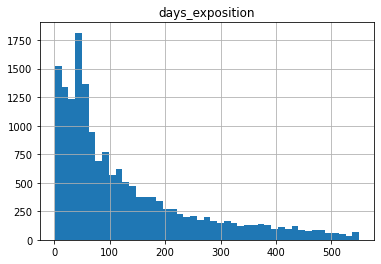

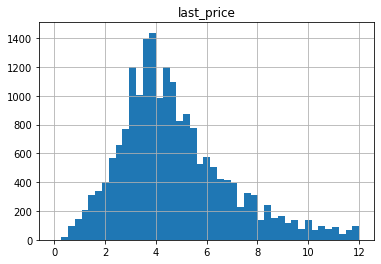

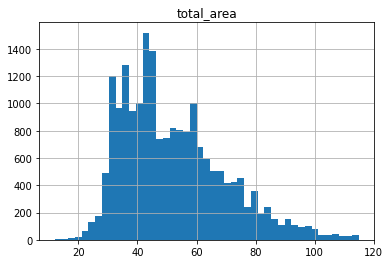

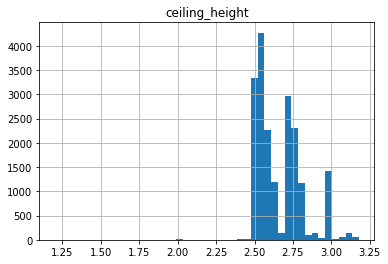

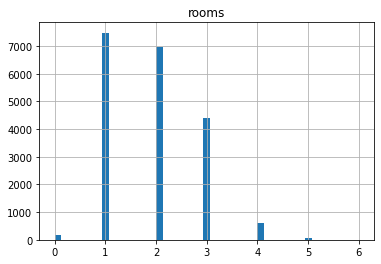

In [77]:
cols = ['days_exposition', 'last_price', 'total_area', 'ceiling_height', 'rooms']
for col in cols:
    good_data.hist(col, bins=45)

#### Вывод

Мы исключили данные, значения которых были очень редки или выбивались из общего массива. Доля таких данных оказалась довольно существенной, однако на данном этапе предлагается их обросить ради более точного анализа далее. Возможно часть этих данных можно исследовать отдельно, например как дорогую или очень большую недвижимость.

##### Факторы, влияющие на стоимость квартиры

Постороим таблицу корреляции цены от площади, колличесва комнат и удаленности от цетра 

,total_area,rooms,last_price,city_centers_nearest
total_area,1.000000,0.801648,0.690093,-0.094935
rooms,0.801648,1.000000,0.424122,-0.053522
last_price,0.690093,0.424122,1.000000,-0.316213
city_centers_nearest,-0.094935,-0.053522,-0.316213,1.000000


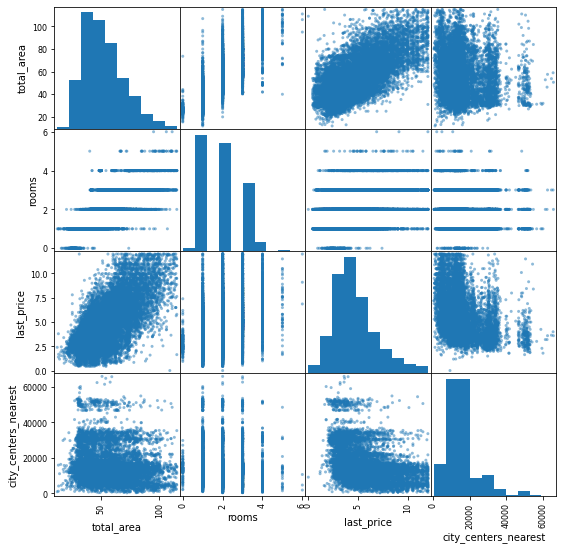

In [78]:
cols = ['total_area', 'rooms','last_price', 'city_centers_nearest']
display(good_data[cols].corr())
pd.plotting.scatter_matrix(good_data[cols], figsize=(9,9))
plt.show()

1. Самая сильная зависимость между ценой и площадью квартиры: чем больше квартира, тем она и дороже.
2. Зависимость цены от удаленности центра очень неоднозначная.Это можно объяснить тем, что удаленность от центра в нашей выборке очень условна, так как у нас есть один большой город и дана только удаленность до него из различных районов, при в этом столбце много пропущенных значений по данным из ленобласти. По данному графику нельзя сделать выводов о простой зависимости цены от центра, рассмотрим этот критерий ниже и ограничившись лишь теми объявлениями, которые указали Санкт-Петербург как название населенного пункта. Сейчас можно лишь заметить, что квартиры ближе всего к центру имеют очень сильный разбос в цене, квартиры средней удаленности стоят чуть выше среднего и есть некий отдельный кластер квартир, которые расположены далеко и стоят дешево. 
3. По колличесву комнат можно сказать, что двух и трехкомнатные квартиры представлены в любом ценовом диапозоне, в то время как однакомнатные квартиры ожидаемо в более низком ценовом диапозоне, а 4х и более в высоком. Однако стоит заметить, что это зависимость явно слабее, чем зависимость от площади 

Посмотрим зависимость этажа от цены, построив сводную таблицу

In [79]:
floor_corr = good_data.pivot_table(
        index="floor_first_last", values="last_price")
floor_corr

,last_price
floor_first_last,
другой,4.943471
первый,4.018300
последний,4.320616


По данным таблицы этаж влияет на цену.Средняя цена на первом на четверть ниже, чем на любом другом (кроме последнего). Последний этаж также отрицательно влияет на стоимость - она примерно на 10% ниже, чем у квартир на других этажах.

Рассмотрим зависимость даты размещения объявления от цены 

In [80]:
weekday_corr = good_data.pivot_table(
        index="weekday_exp", values="last_price")
weekday_corr


,last_price
weekday_exp,
0,4.763897
1,4.777561
2,4.761830
3,4.743868
4,4.728792
5,4.641392
6,4.695495


Похоже, что цена не сильно зависит от дня недели размещения объявления, однако можно заметить, что средняя цена объявлений, размешенных в субботу, слегка ниже тех, что размещены в другие будние дни. 

<AxesSubplot:xlabel='month_exp'>

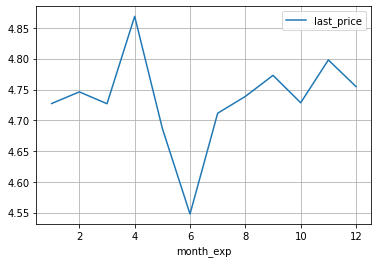

In [81]:
month_corr = good_data.pivot_table(
        index="month_exp", values="last_price")
month_corr
month_corr.plot(grid=True)

Зависимость от месяца не так сильно выражена также, однако можно заметить, что самая низкая среднняя цена приходится на июнь, а самая высокая на апрель. Возможно, это связано с тем, что летом спрос на недвижимость ниже из-за сезона отпусков. 

In [82]:
year_corr = good_data.pivot_table(
        index="year_exp", values="last_price", aggfunc = ["mean", 'median'])
year_corr

,mean,median
,last_price,last_price
year_exp,,
2014,6.491429,7.50000
2015,4.931439,4.50000
2016,4.638027,4.20000
2017,4.685630,4.20000
2018,4.702760,4.30000
2019,5.052014,4.76747


Зависимость стоимости от года напрямую отражает экономическую ситуацию в России. В 2014 году был кризис и после него цены на недвижимость резко упали, так как понизилась платежеспособность населения. К тому же, если сравнить среднюю стоимость по годам с медианной стоимостью по годам, можно увидеть, в 2014 году они сильно отличались друг от друга, в то время как в 2015 их разница уменьшилась. Это может говорить о том, что с рынка ушла часть очень дорогой недвижимость, что тоже характерно для последствий кризиса. 

##### Вывод

Факторы, которые больше всего влияют на стоимость квартир - это площадь (чем-нибудь она больше, тем дороже квартира),этаж (последний и первый снижают стоимость) и год, когда опубликовали объявление(после 2014 года наблюдается спад цен из-за последствий кризиса). 
Также есть гипотеза, что удаленность от центра влияет на стоимость, однако необходимо рассмотреть эти данные точнее. 

##### Населённые пункты с наибольшим числом объявлений

Найдем самые населенные пункты с наибольшим количеством объявлений и посмотрим сколько там в среднем стоит квадратный метр

In [63]:
popular_towns = good_data.pivot_table(index="locality_name", values = "square_m_price", aggfunc= ['count', 'mean'])
popular_towns.columns =["count", 'square_m_price']
popular_towns.sort_values(by='count', ascending=False).head(10)


,count,square_m_price
locality_name,,
Санкт-Петербург,12361,105657.865745
посёлок Мурино,492,85784.658939
посёлок Шушары,418,78545.706186
Всеволожск,361,67036.637496
Колпино,316,75238.328303
посёлок Парголово,314,90081.731542
Пушкин,304,99895.373921
Гатчина,278,68818.550006
деревня Кудрово,271,92532.646625


Отсортируем таблицу по стоимость квадратного метра

In [64]:
popular_towns.sort_values(by='count', ascending=False).head(10).sort_values(by='square_m_price', ascending=False)

,count,square_m_price
locality_name,,
Санкт-Петербург,12361,105657.865745
Пушкин,304,99895.373921
деревня Кудрово,271,92532.646625
посёлок Парголово,314,90081.731542
посёлок Мурино,492,85784.658939
посёлок Шушары,418,78545.706186
Колпино,316,75238.328303
Гатчина,278,68818.550006
Всеволожск,361,67036.637496


#### Вывод

Из самых популярных населенных пунктов самая высокая стоимость жилья ожидаемо в Санк-Петербурге, однако в городе Пушкин почти такая же стоимость квадратного метра. Также высокая стоимость в деревнях Кудрово и Парголово. Самая недорогая стоимость жилья в Гатчине, Всеволжске и особенно в Выборге (почти вдвое меньше, чем в Санкт-Петерберге и Пушкине)

##### Предложения квартир

Для решения следуших задач нам понадобится выделить только квартиры в Санкт-Петербурге. Мы будем производить математические операции со столбцами и намеренно будем делать это на срезе. 
Добавим столбец с указание расстояния до центра в километрах и округлим данные до целых чисел. 

In [83]:
good_data_spb = good_data.query('locality_name == "Санкт-Петербург"')
good_data_spb['city_center_km'] = good_data_spb['city_centers_nearest'].apply(lambda x: round(x /1000))
good_data_spb.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,square_m_price,weekday_exp,month_exp,year_exp,floor_first_last,living_total_ratio,kitchen_total_ratio,city_center_km
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.000000,13,NaN,...,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000,8
7,5,7.915,71.6,2019-04-18,2,2.75,24,40.681818,22,NaN,...,NaN,NaN,110544.692737,3,4,2019,другой,0.568182,0.263966,12
9,18,5.400,61.0,2017-02-26,3,2.50,9,43.600000,7,NaN,...,NaN,289.0,88524.590164,6,2,2017,другой,0.714754,0.106557,15
10,5,5.050,39.6,2017-11-16,1,2.67,12,20.300000,3,NaN,...,553.0,137.0,127525.252525,3,11,2017,другой,0.512626,0.214646,14
15,16,4.650,39.0,2017-11-18,1,2.60,14,20.500000,5,NaN,...,296.0,19.0,119230.769231,5,11,2017,другой,0.525641,0.194872,14


Постороим сводную таблицу, в которой к каждому километру будет соответсвовать средняя стоимость квартиры на этом расстоянии от центра, и нарисуем график по ней

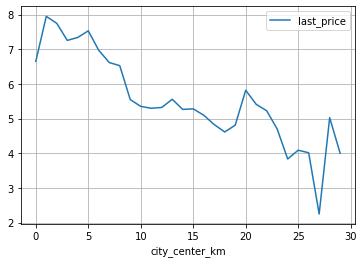

In [85]:
km_price = good_data_spb.pivot_table(index='city_center_km', values='last_price')
km_price.plot(grid=True)
plt.show()

На графике виден провал цены в очень близком рассположении к центру (где-то в районе 3х км) - географически в этом радиусе находятся бльшинство вокзалов и промзона на Васильевском острове, возможно это объясняет провал. Также в районе 20 км от центра есть огромный пик - возможно там рассположен какой-то элитный поселок или новый дорогой жк. Не считая этих особенностей, можно сказать, что пик после которого цены идут на спад приходится примерно на 8 км. Значит все, что находится в радиусе 8 км, будем считать центральной зоной

##### Вывод

Благодаря графику, который показывает, как цена зависит от удалённости от центра, мы определили границу центральнаой зоны - 8км

##### Квартиры в центре

Выделим только квартиры в центре и рассмотрим их харктеристики подробнее 

In [87]:
co_flats = good_data_spb.query('city_center_km <= 8') 

<AxesSubplot:xlabel='total_area', ylabel='Density'>

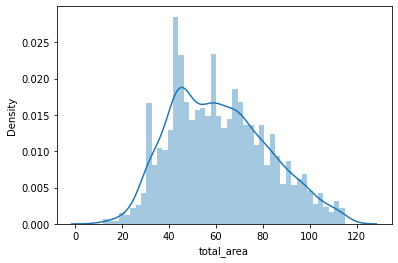

In [88]:
sns.distplot(co_flats['total_area'], kde = True, bins = 45)

По площади самые популярные квартиры в центре либо 42-43 метра, либо 60м 

<AxesSubplot:xlabel='last_price', ylabel='Density'>

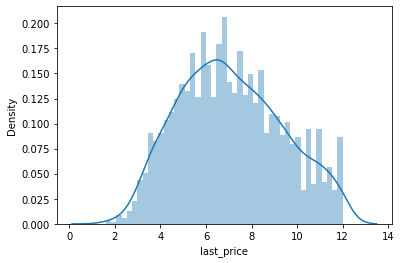

In [89]:
sns.distplot(co_flats['last_price'], kde = True, bins = 45)

Большинство квартир в центре стоят в районе 7 млн

<AxesSubplot:xlabel='rooms'>

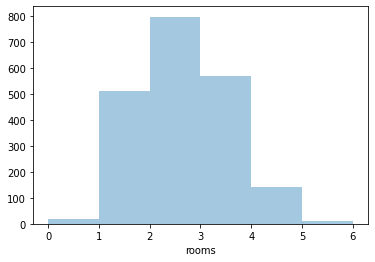

In [90]:
sns.distplot(co_flats['rooms'], kde = False, bins = 6)

Самые типичные для наших данных квартиры в центре 2хкомнатные, а вот 3х и однокомнатные встречаются реже

<AxesSubplot:xlabel='ceiling_height', ylabel='Density'>

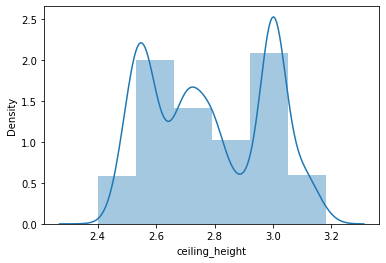

In [91]:
sns.distplot(co_flats['ceiling_height'], kde = True, bins = 6)

Высота потолка в центре может быть либо в районе 3м, либо в районе 2,6м 

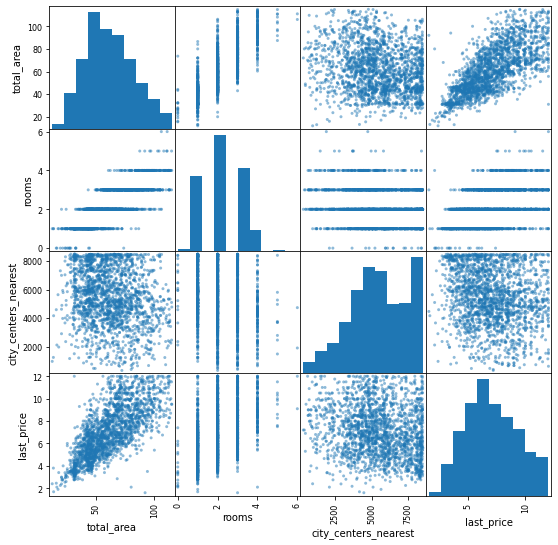

In [93]:
cols = ['total_area', 'rooms','city_centers_nearest', 'last_price']
co_flats[cols].corr()

pd.plotting.scatter_matrix(co_flats[cols], figsize=(9,9))
plt.show()

Снова самая сильная зависимость это площадь: чем больше площадь, тем выше стоимость. Однако, колличество комнат тоже играет свою роль чем меньше комнат, тем дешевле квартира, хотя и есть дорогие однокомнатные квартиры, что объясняется их высокой ликвидностью. Корреляция от центра в данном случае не выявлена, что странно, поэтому можно рассмотреть этот фактор подробнее, взяв среднюю цену за километр и построив график

<AxesSubplot:xlabel='city_center_km'>

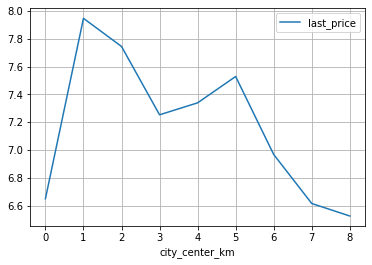

In [73]:
km_price2 = co_flats.pivot_table(index='city_center_km', values='last_price')
km_price2.plot(grid=True)

Как и было замечено выше в радиусе 3х км есть некая яма, однако разброс между квартирами которые находятся в самом цетнре (1-2 км) и теми которые находятся в радиусе 7 может доходить почти до полутора миллиона. Также, странно, что квартиры которые находятся в радиусе от 0 до 1 км, стоят заметно дешевле - на это стоит обратить внимение и точнее изучить вопрос, что именно считается центром и возможно проверить эти квартиры на предмет мошеннической деятельности. 

In [74]:
floor_corr = co_flats.pivot_table(
        index="floor_first_last", values="last_price")
floor_corr

,last_price
floor_first_last,
другой,7.293927
первый,6.095521
последний,7.106791


В отличие от данных по всем объявлениям, жизнь в центре на последнем этаже не сильно хуже, чем на любом другом. А вот первый этаж по-прежнему стоит меньше 

In [75]:
day_corr = co_flats.pivot_table(
        index="weekday_exp", values="last_price")
day_corr

,last_price
weekday_exp,
0,7.189892
1,6.996180
2,7.102020
3,7.020113
4,7.161543
5,7.012564
6,7.282831


От дня недели снова не сильная зависимость, однако можно сказать, что объявления выставленные в воскресенье запрашивают чуть более высокую цену

<AxesSubplot:xlabel='month_exp'>

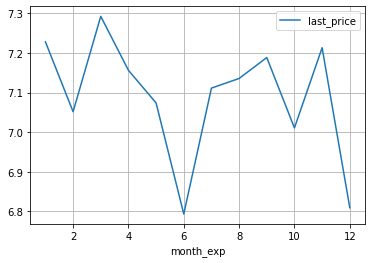

In [76]:
month_corr = co_flats.pivot_table(
        index="month_exp", values="last_price")
month_corr
month_corr.plot(grid=True)

Зависимость от месяца в центре сильнее, чем по городу в целом и всей области. Объявления, выставленные в июне и декабре заявляют более низкую цену. А вот самые дорогие объявления вывешивают в марте 

In [77]:
year_corr = co_flats.pivot_table(
        index="year_exp", values="last_price")
year_corr

,last_price
year_exp,
2015,6.893185
2016,7.009051
2017,7.078519
2018,7.077069
2019,7.368751


#### Вывод

Самая типичная квартира в центре имеет площадь от 45 до 60 кв.м. (как и самые средние квартиры по всем данным), средняя цена в центре ожидаемо выше (более, чем в 1,5 раза), что говорит о явной зависимости между удаленностью от центра и ценой. Для центра более типична двухкомнатная квартира, в то время как на всей территирории однушек примерно столькоко же, сколько и двушек (что возможно говорит о том, что даже маленькие квартиры в центре принято делать скорее двухкомнатными). В центре больше квартир с высоким потолком, хотя и типичный потолок в 2,7 тоже не редкость. 
Стоимость квартир в центре также зависит от площади, но количесвто комнат здесь имеет большую роль, чем на всей выборке. Квартиры на первом этаже всегла дешевле, однако по всей области последний этаж также менее предпочтителен, в то время как в центре последний этаж меньше влияет на стоимость.
Влияние даты размещения на стоимость в центре сильнее, чем по всей области. Так обявления, размешенные в июне и декабре имеют в целом более низкую стоимость

### Шаг 5. Общий вывод

Было проведен анализ данных по объявлениям о продаже квартир в Санкт-Петербурге и окрестностях. Вот выводы из этого анализа: 
1. Качество данных. Часть пропусков данных не подлежит заполнению, так как некторые данные собраны некоректнным образом: столбец о том ялвяется ли квартира апартаментами стоит либо убрать из объявлений, либо сделать этот тип данных логическим. Также пользователь сам вводит название населенного пункта, что приводит к путаннице: автоматически невсегда можно верно считать это название, что дает большое колличесвто расчетах расстояний.
2. Квартиры в центральном сегменте значительно отличаются от квартир по всей области. Они заметно дороже, но не больше по площади, в них больше двухкомнатных квартир и выше потолки. Последние этажи домов в центре не так влияют на стоимость, как последние этажи по всей области. Также объявления на квартиры в центре более чуствительны к сезонным изменениям: в начале зимних и летних каникул можно встретить объявления с более низкой ценой. 
3. В ходе анализа были выялено некоторые аномалии, которые возможно стоит рассмотреть на предмет мошенничесокой деятельности: слишком быстрая продажа квартир (до 5 дней) и слишком низкие цены на недвижимость в районе 0-1 км от центра.